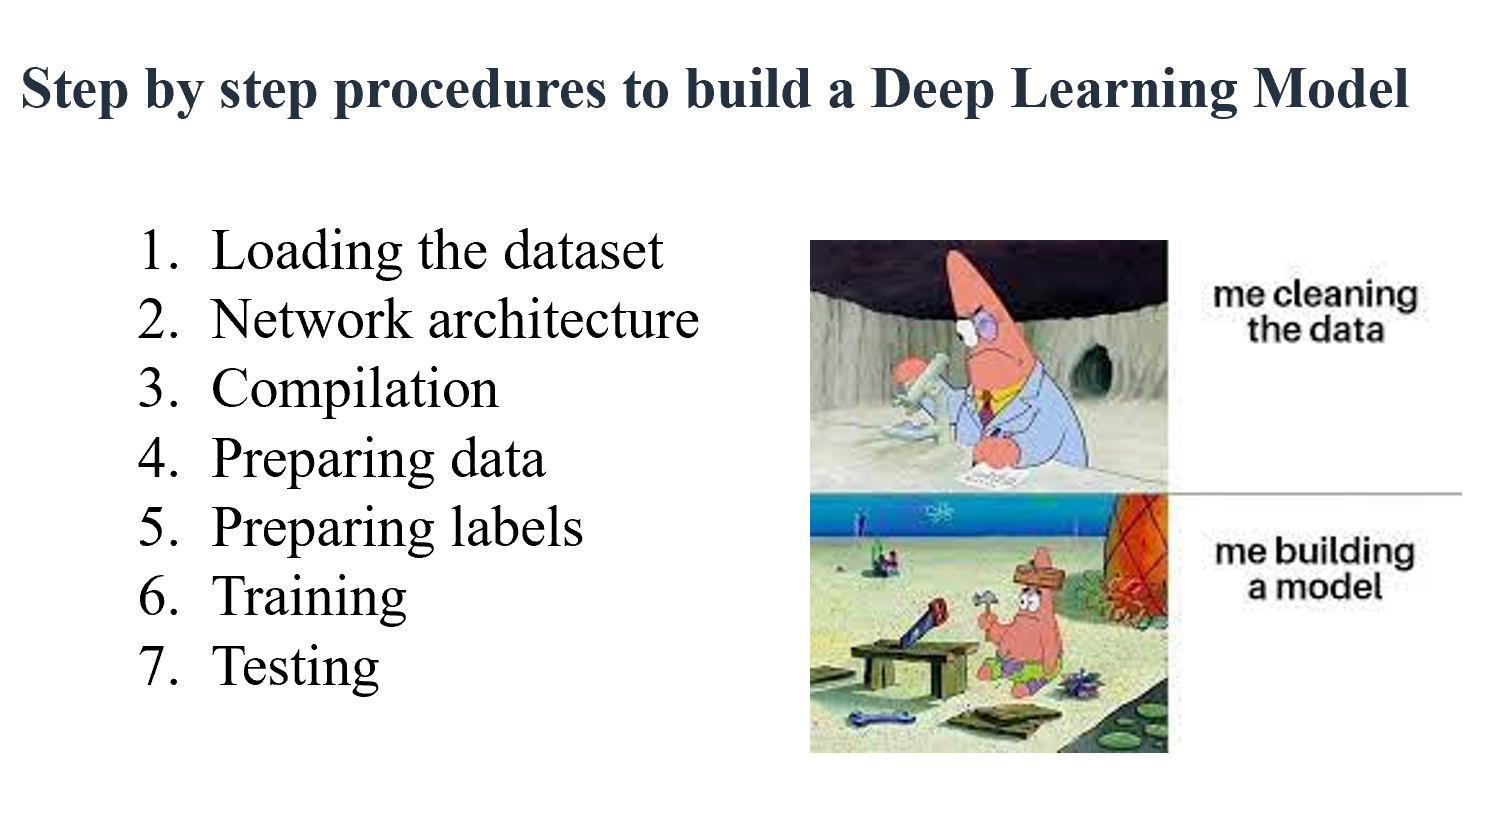

In [14]:
# 1. load the dataset 
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

In [15]:
# check the sizes of data

print ('training images shape', train_images.shape)
print ('testing images shape', test_images.shape)


print ('training labels shape', train_labels.shape)
print ('testing labels shape', test_labels.shape)


training images shape (60000, 28, 28)
testing images shape (10000, 28, 28)
training labels shape (60000,)
testing labels shape (10000,)


In [16]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

the lable of thsi image is  1


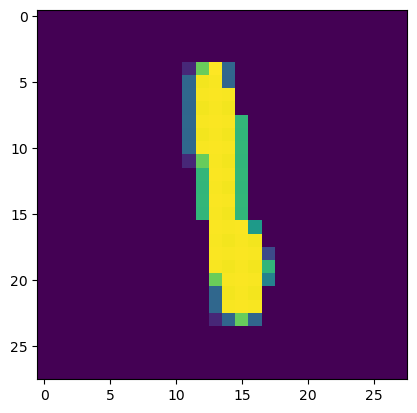

In [17]:
# plot some images in the dataset 
i= 200
from matplotlib import pyplot as plt
plt.imshow(train_images[i])
print('the lable of thsi image is ' , train_labels[i])

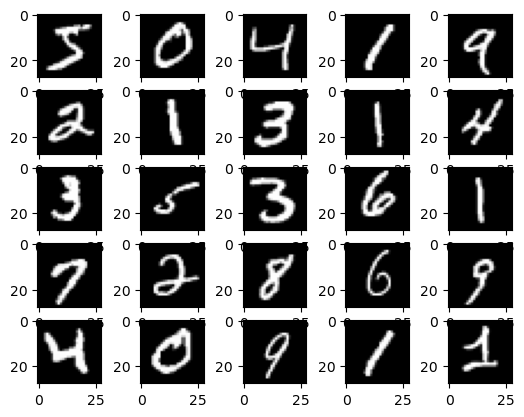

In [18]:
# plot first few images
from matplotlib import pyplot as plt
for i in range(25):
	# define subplot
	plt.subplot(5,5,i + 1)
	# plot raw pixel data
	plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [19]:
# 2. Create model 

import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Activation, Dense, Flatten

input_shape = (28,28,1)
num_class = 10 


# create model LeNet5
cnn_model = Sequential()


# Input layer 

# C1
cnn_model.add(Conv2D(6,(5,5), input_shape= input_shape))
# activation 
cnn_model.add(Activation('tanh'))

#P1
cnn_model.add(AveragePooling2D(pool_size=(2, 2),strides=2))
# activation 
cnn_model.add(Activation('tanh'))


# C2
cnn_model.add(Conv2D(16,(5,5)))
# activation 
cnn_model.add(Activation('tanh'))


#P2
cnn_model.add(AveragePooling2D(pool_size=(2, 2),strides=2))
# activation 
cnn_model.add(Activation('tanh'))


# C3
cnn_model.add(Conv2D(120,(4,4)))
# activation 
cnn_model.add(Activation('tanh'))


# flatten 
cnn_model.add(Flatten())

# fully connected layer 
cnn_model.add(Dense(84))
cnn_model.add(Activation('tanh'))


# output layer
cnn_model.add(Dense(num_class))
cnn_model.add(Activation('softmax')) # multi class 

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 6)         0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
activation_8 (Activation)    (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
activation_9 (Activation)    (None, 8, 8, 16)          0         
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)         

In [20]:
# 3. Compile the model
cnn_model.compile(loss= 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
# 4 preapare the data 

# 4.1 reshape
train_images_reshaped = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_images_reshaped= test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

print ("Before reshaping", train_images.shape)
print ("After reshaping", train_images_reshaped.shape)


# 4.2 normalize
train_images_reshaped_normalized= train_images_reshaped.astype('float32')/255
test_images_reshaped_normalized = test_images_reshaped.astype('float32')/255



#5 parepare the labels (0-9 --> one hot encoding )
from tensorflow.keras.utils import to_categorical
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical (test_labels)



Before reshaping (60000, 28, 28)
After reshaping (60000, 28, 28, 1)


In [22]:
# 7. train the model

# training_images = X_train
# testing_images = X_test

# training_label = y_train
# testing_label = y_test

# fit training_image, training_label, epoch, batch_size
cnn_model.fit(train_images_reshaped_normalized,train_labels_one_hot,epochs=5,batch_size=100)


Epoch 1/5
600/600 [==============================] - 16s 26ms/step - loss: 1.3267 - accuracy: 0.66370s - loss: 1.3644  - ETA: 0s - loss: 1.3353 - accuracy
Epoch 2/5
600/600 [==============================] - 16s 26ms/step - loss: 0.4924 - accuracy: 0.8704
Epoch 3/5
600/600 [==============================] - 15s 26ms/step - loss: 0.3781 - accuracy: 0.8946
Epoch 4/5
600/600 [==============================] - 16s 26ms/step - loss: 0.3274 - accuracy: 0.9066
Epoch 5/5
600/600 [==============================] - 16s 26ms/step - loss: 0.2931 - accuracy: 0.9159


In [23]:
# 8. Evaluating the model
test_loss,test_acc = cnn_model.evaluate(test_images_reshaped_normalized,test_labels_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.2633 - accuracy: 0.9241
test_acc: 0.9240999817848206


### Plotting Training and Validation loss

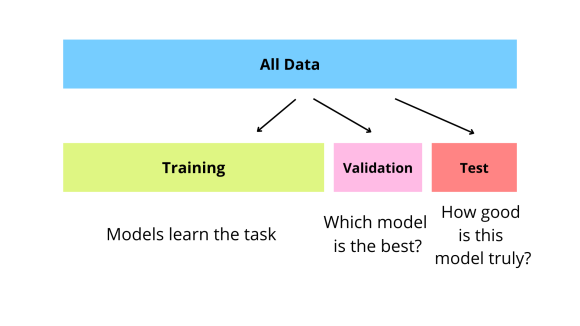

In [24]:
#cnn_model.fit(train_images_reshaped_normalized,train_labels_one_hot,epochs=5,batch_size=100)

X_train =train_images_reshaped_normalized 
y_train =  train_labels_one_hot 


X_test =  test_images_reshaped_normalized
y_test = test_labels_one_hot


batch_size = 32
epochs = 5

# Fitting the model on the training set
history = cnn_model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, 
                      steps_per_epoch = X_train.shape[0]//batch_size, 
                      validation_data = (X_test, y_test), 
                      validation_steps = X_test.shape[0]//batch_size, verbose = 1)

Epoch 1/5
1875/1875 [==============================] - 26s 13ms/step - loss: 0.2456 - accuracy: 0.9287 - val_loss: 0.1997 - val_accuracy: 0.9399
Epoch 2/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1905 - accuracy: 0.9444 - val_loss: 0.1566 - val_accuracy: 0.9528
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1535 - accuracy: 0.9548 - val_loss: 0.1300 - val_accuracy: 0.9612
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1283 - accuracy: 0.9622 - val_loss: 0.1126 - val_accuracy: 0.9654
Epoch 5/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1111 - accuracy: 0.9670 - val_loss: 0.0970 - val_accuracy: 0.9696


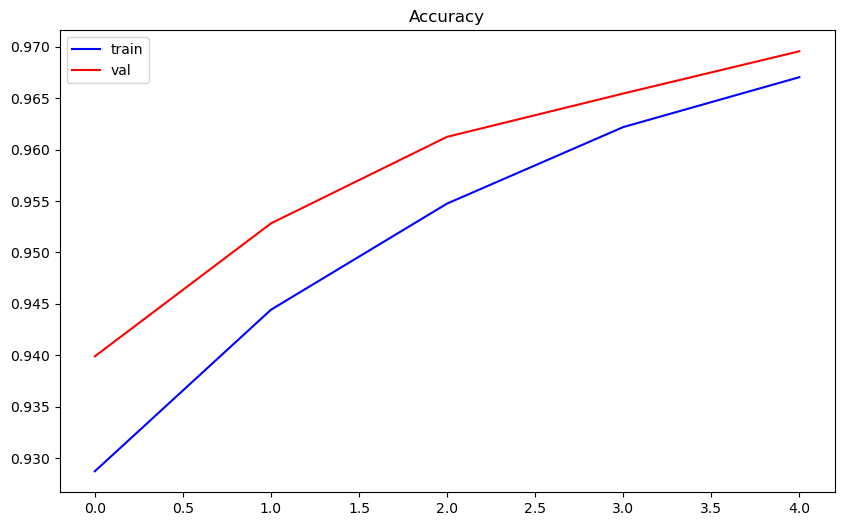

In [25]:
#from matplotlib import pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
plt.legend()
plt.title('Accuracy')
plt.show()

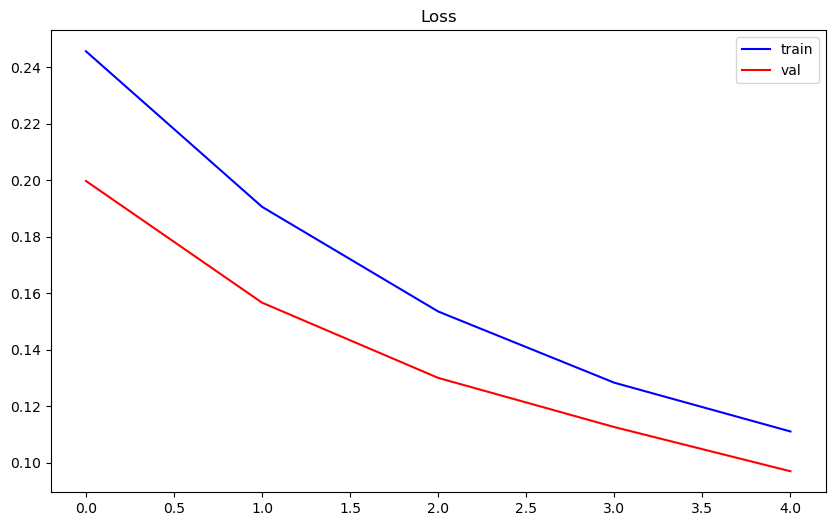

In [26]:
#from matplotlib import pyplot as plt

plt.figure(figsize = (10,6))
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'red', label = 'val')
plt.legend()
plt.title('Loss')
plt.show()

## Notes
#### one epoch = one forward pass and one backward pass of all the training examples.
#### batch size = the number of training examples in one forward/backward pass. ...
#### steps per epoch = total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch

The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset. In general, batch size of 32 is a good starting point, and you should also try with 64, 128, and 256.


The number of epochs can be set to an integer value between one and infinity. 


 steps_per_epoch = X_train.shape[0]//batch_size,  

